In this Project, I perform a Support Vector Machine Learning algorithm on a real world dataset containing measurements of different flowers. The algorithm separates and classifies the species based on certain features. The dataset is trained, splitted, and fitted to a model that makes these predictions. Even though the model performed well, I still tried to optimize the performance by conducting a gridsearch. This helped fin


The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Exploratory Data Analysis

In [10]:
iris = sns.load_dataset('iris')

In [11]:
iris.head(2)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


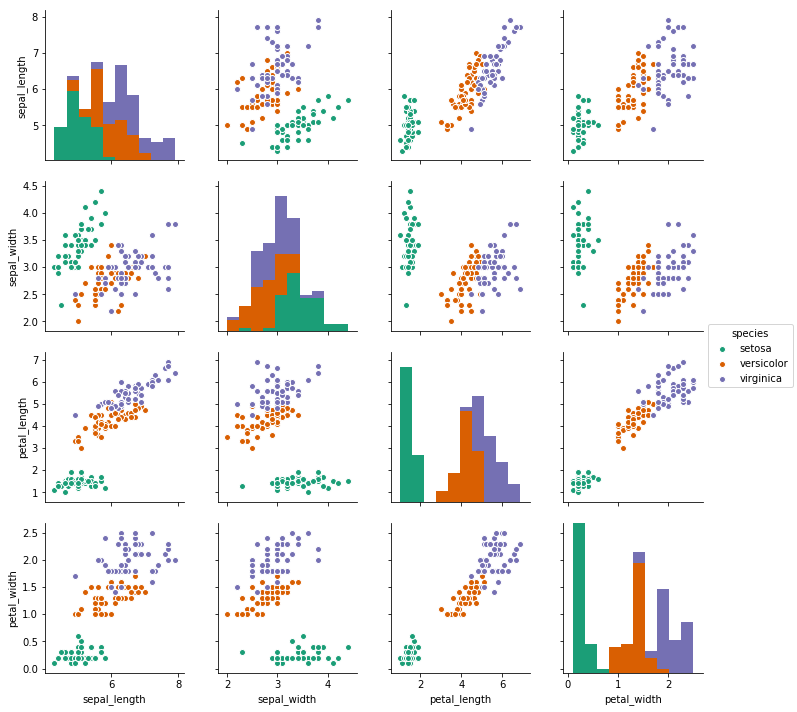

In [12]:
sns.pairplot(iris,hue='species',palette='Dark2')

It appears from this data visualization that the setosa species is most separable, and that our machine learning algorithm should easily be able to separate that.

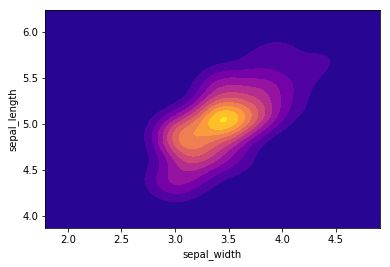

In [14]:
setosa = iris[iris['species']=='setosa']
sns.kdeplot(setosa['sepal_width'],setosa['sepal_length'],cmap='plasma',shade=True,shad_lowest=False)

kde plot of sepal length vs sepal width for setosa species

# Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [17]:
X = iris.drop('species',axis=1)
y = iris['species']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training the Model

In [18]:
from sklearn.svm import SVC

In [19]:
svc_model = SVC()

In [21]:
svc_model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

# Model Evaluation

In [26]:
predictions = svc_model.predict(X_test)

In [27]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



In [30]:
print(confusion_matrix(y_test,predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


As can be seen our model did significantly well, with the average, precision, and recall at 1.00

# Use of Gridsearch

In [31]:
from sklearn.grid_search import GridSearchCV

In [33]:
param_grid = {'C':[0.1,1,10,100],'gamma':[1,0.1,0.1,0.01,0.001]}

In [36]:
grid = GridSearchCV(SVC(),param_grid,verbose=2)
grid.fit(X_train,y_train) #fit to training data

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=1 ..................................................
[CV] ......................................... C=0.1, gamma=1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....................................... C=0.1, gamma=0.1 -   0.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ...........

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=0.01 ................................................
[CV] ....................................... C=10, gamma=0.01 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................................... C=10, gamma=0.01 -   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....................................... C=10, gamma=0.01 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................................... C=10, gamma=0.001 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................................... C=10, gamma=0.001 -   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...................................... C=10, gamma=0.001 -   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ......................................... C=100, gamma=1 -   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    0.4s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=2)

In [37]:
grid_predictions = grid.predict(X_test)

In [39]:
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        19
 versicolor       1.00      1.00      1.00        13
  virginica       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        45



Overall both models performed excellent; however the point of going through with the grid search is to optimize paramaters which is especially helpful with real world problems.